In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################################################
# --> Working directories
import os
print(os.getcwd())
path="C:/Users/Peter/Documents/zverev_analysis/"
os.chdir(path)
################################################

# --> read in data
dat = pd.read_csv('./data/atp_fulldata.csv', encoding='latin1')


# --> look at only the 2019 season
data_2019 = dat[dat.year == 2019]

# Serve stats
# Average stats
data_2019_mean = data_2019.groupby(['server']).mean()

# Add No. of matches played by each player
match_counts = data_2019.groupby(['server']).size()
data_2019_mean['num_matches'] = match_counts.values

# Consider only players who played at least 15 matches?
#data_2019_mean = data_2019_mean[data_2019_mean.num_matches >= 15]

# Consider only players who are ranked in top 100
# Most top players will be playing against top players, so ot shouldn't
# matter who we filter by their opponent
data_2019_mean = data_2019_mean[(data_2019_mean.server_rank <= 100) ]


C:\Users\Peter\Documents\zverev_analysis


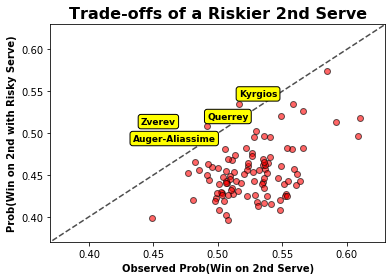

<Figure size 2160x1080 with 0 Axes>

In [7]:
##### ----- ##### ----- ##### ----- ##### ----- ##### ----- ##### 
# 'A Risky serve' plot (same as seen in fivethirtyeight)
##### ----- ##### ----- ##### ----- ##### ----- ##### ----- ##### 
risky_adv_dat = data_2019_mean.reset_index()

# Only consider players ranked top 100
risky_adv_dat = risky_adv_dat[risky_adv_dat['server_rank'] <=100]

# --> Who are above the line?
risky_adv_dat[risky_adv_dat['pr_win_on_1st_serve'] >  risky_adv_dat['pr_win_on_2nd_serve']]
# Zverev, FAA, Kyrgios, Querrey

# --> What is Zverev's percentage difference?
tosee = risky_adv_dat[risky_adv_dat.server == 'Alexander Zverev']
tosee['pr_win_on_1st_serve'] - tosee['pr_win_on_2nd_serve']
# 4.4% increase


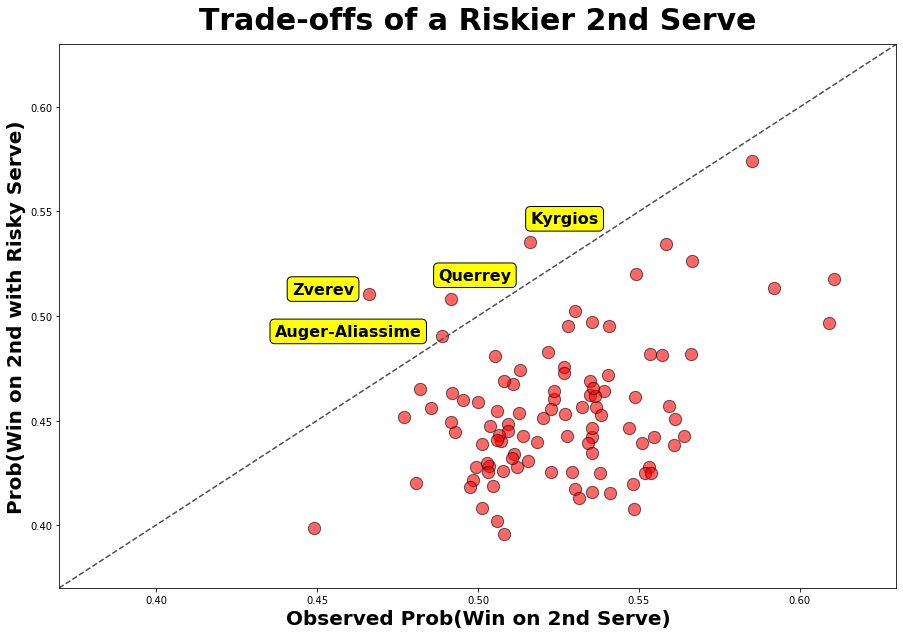

In [74]:
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams['axes.titlepad'] = 15 

fig=plt.figure()


#ax=fig.add_axes([0,0,1,1])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(risky_adv_dat['pr_win_on_2nd_serve'],
           risky_adv_dat['pr_win_on_1st_serve'],
           color='r',
           edgecolor = 'black',
           alpha = 0.6,
           s = 150
          )
ax.set_xlabel('Observed Prob(Win on 2nd Serve)', fontweight = 'bold', size = 20)
ax.set_ylabel('Prob(Win on 2nd with Risky Serve)', fontweight = 'bold', size = 20)
ax.set_title('Trade-offs of a Riskier 2nd Serve', 
             fontweight = 'bold',
             fontsize = 30
             )
ax.plot([0, 1], [0, 1], ls="--", c=".3")
ax.set(xlim=(0.37, 0.63), ylim=(0.37, 0.63))


zverev_coord = (risky_adv_dat[risky_adv_dat.server == 'Alexander Zverev']['pr_win_on_2nd_serve'].values- 0.024,
            risky_adv_dat[risky_adv_dat.server == 'Alexander Zverev']['pr_win_on_1st_serve'].values)

faa_coord = (risky_adv_dat[risky_adv_dat.server == 'Felix Auger Aliassime']['pr_win_on_2nd_serve'].values-0.052,
            risky_adv_dat[risky_adv_dat.server == 'Felix Auger Aliassime']['pr_win_on_1st_serve'].values)

kyrgios_coord = (risky_adv_dat[risky_adv_dat.server == 'Nick Kyrgios']['pr_win_on_2nd_serve'].values + 0.0,
            risky_adv_dat[risky_adv_dat.server == 'Nick Kyrgios']['pr_win_on_1st_serve'].values + 0.009)

querrey_coord = (risky_adv_dat[risky_adv_dat.server == 'Sam Querrey']['pr_win_on_2nd_serve'].values - 0.004,
            risky_adv_dat[risky_adv_dat.server == 'Sam Querrey']['pr_win_on_1st_serve'].values + 0.009)


#isner_coord = (risky_adv_dat[risky_adv_dat.server == 'John Isner']['actual_2nd_serve_win_percent'].values,
#            risky_adv_dat[risky_adv_dat.server == 'John Isner']['new_strategy'].values)


ax.annotate('Zverev', zverev_coord, fontweight = 'bold',
            fontsize = 16,
            bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))
ax.annotate('Auger-Aliassime', faa_coord,fontweight = 'bold',
            fontsize = 16,
            bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))
ax.annotate('Kyrgios', kyrgios_coord,fontweight = 'bold',
            fontsize = 16,
            bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))
ax.annotate('Querrey', querrey_coord,fontweight = 'bold',
            fontsize = 16,
            bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))
#ax.annotate('Isner', isner_coord)
plt.show()
#plt.savefig('atp_2019_two_first_serves.png', dpi=fig.dpi)